<a href="https://colab.research.google.com/github/wiroel/my-repo/blob/main/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##OUTLIER REMOVAL
- z-score-trimming{(UL= mean+3std,,, LL= mean-3std), z-score= value-mean/std ko value+3 rw -3 bich huna paryoo},  and capping(np.where())
- IQR(q3-q1), upper_limit(q3+1.5*iqr), lower_limit(q1-1.5*iqr)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import gdown

file_id="1xXq0C2bG5lGHZ4gyfNXuSJKcQVHUuH7v"
file_name = 'Label_Encoded.csv'

gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

df=pd.read_csv(file_name)

df

Downloading...
From: https://drive.google.com/uc?id=1xXq0C2bG5lGHZ4gyfNXuSJKcQVHUuH7v
To: /content/Label_Encoded.csv
100%|██████████| 941k/941k [00:00<00:00, 107MB/s]


,Year,Track,Track_encoded,Country,Country_encoded,Position,Driver,Driver_encoded,Team,Team_encoded,Starting Grid,Points,Pitstop Time,Weather,avg_confidence_score
0,2001,Albert Park Grand Prix Circuit,0,Australia,0,1,Michael Schumacher,70,Ferrari,7,1,10.0,28.7170,1,0.783739
1,2001,Albert Park Grand Prix Circuit,0,Australia,0,2,David Coulthard,20,McLaren,17,6,6.0,28.5160,1,0.551130
2,2001,Albert Park Grand Prix Circuit,0,Australia,0,3,Rubens Barrichello,100,Ferrari,7,2,4.0,28.6580,1,0.783739
3,2001,Albert Park Grand Prix Circuit,0,Australia,0,4,Nick Heidfeld,77,Sauber,22,10,3.0,28.2470,1,0.255000
4,2001,Albert Park Grand Prix Circuit,0,Australia,0,5,Heinz-Harald Frentzen,37,Jordan,12,4,2.0,28.1420,1,0.174400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,2023,Yas Marina Circuit,37,UAE,26,16,Logan Sargeant,60,Williams,29,20,0.0,42.3810,0,0.320217
9303,2023,Yas Marina Circuit,37,UAE,26,17,Guanyu Zhou,35,Sauber,22,19,0.0,37.8030,0,0.255000
9304,2023,Yas Marina Circuit,37,UAE,26,18,Carlos Sainz,12,Ferrari,7,16,0.0,40.0685,0,0.783739
9305,2023,Yas Marina Circuit,37,UAE,26,19,Valtteri Bottas,114,Sauber,22,18,0.0,37.8030,0,0.255000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
selected_cols = ['Starting Grid', 'Points', 'Pitstop Time', 'avg_confidence_score']
selected_df = df[selected_cols]
selected_df

,Starting Grid,Points,Pitstop Time,avg_confidence_score
0,1,10.0,28.7170,0.783739
1,6,6.0,28.5160,0.551130
2,2,4.0,28.6580,0.783739
3,10,3.0,28.2470,0.255000
4,4,2.0,28.1420,0.174400
...,...,...,...,...
9302,20,0.0,42.3810,0.320217
9303,19,0.0,37.8030,0.255000
9304,16,0.0,40.0685,0.783739
9305,18,0.0,37.8030,0.255000


<ipython-input-5-e0b0e15fd207>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_df[col])


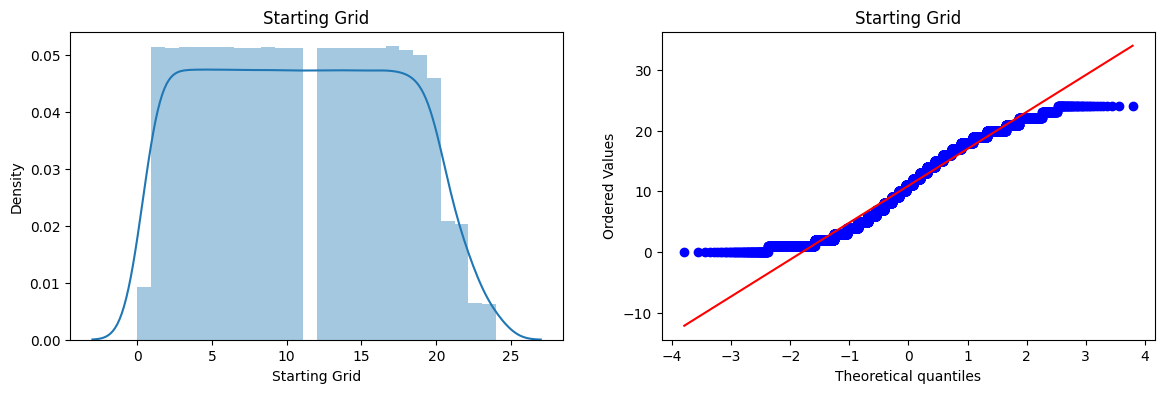

<ipython-input-5-e0b0e15fd207>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_df[col])


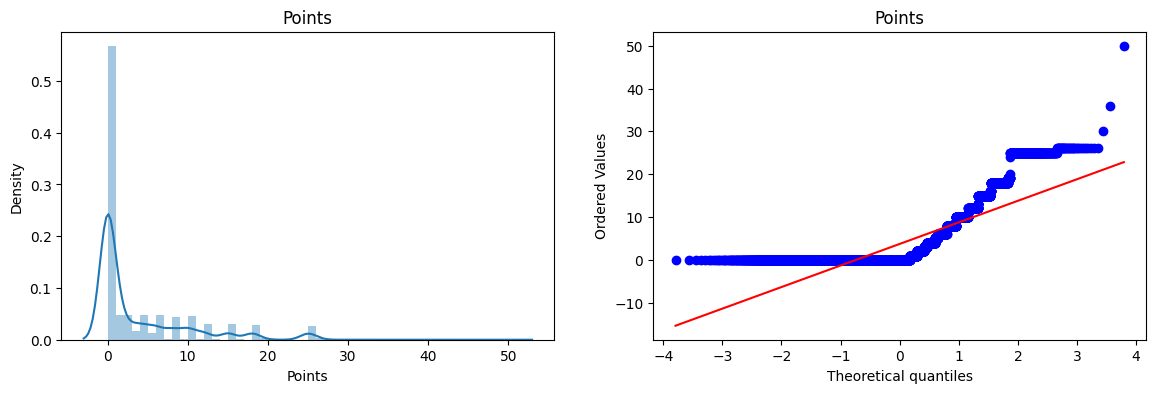

<ipython-input-5-e0b0e15fd207>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_df[col])


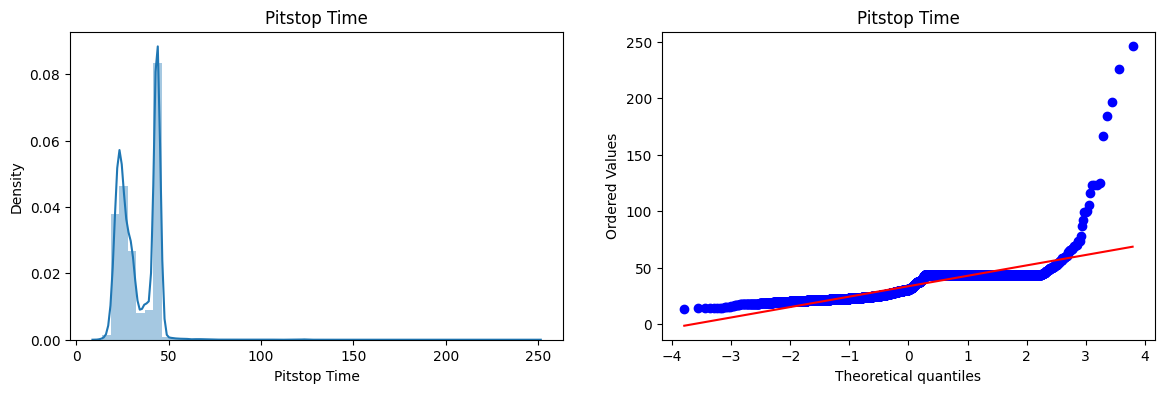

<ipython-input-5-e0b0e15fd207>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(selected_df[col])


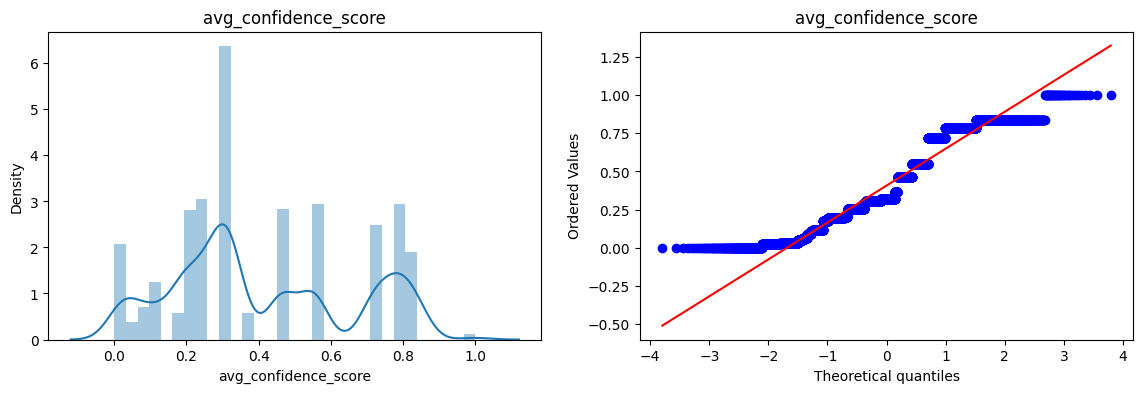

In [5]:

for col in selected_df.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(selected_df[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(selected_df[col], dist='norm', plot=plt)
  plt.title(col)

  plt.show()



In [6]:
X = selected_df.iloc[:, 0:3]
y = selected_df.iloc[:, 3]

In [7]:
X

,Starting Grid,Points,Pitstop Time
0,1,10.0,28.7170
1,6,6.0,28.5160
2,2,4.0,28.6580
3,10,3.0,28.2470
4,4,2.0,28.1420
...,...,...,...
9302,20,0.0,42.3810
9303,19,0.0,37.8030
9304,16,0.0,40.0685
9305,18,0.0,37.8030


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.4400387217424754

In [11]:
np.mean(cross_val_score(LinearRegression(),  X, y, scoring='r2', cv=5))

np.float64(0.41434708684342797)

In [12]:
pt = PowerTransformer()

X_train_trans = pt.fit_transform(X_train)
X_test_trans = pt.fit_transform(X_test)

pd.DataFrame({
    'cols': X_train.columns,
    'lambda': pt.lambdas_
})

,cols,lambda
0,Starting Grid,0.711314
1,Points,-0.698134
2,Pitstop Time,-0.144751


In [13]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred=lr.predict(X_test_trans)
r2_score(y_test, y_pred)

0.42209347435267075

In [14]:
X_trans = pt.fit_transform(X)

np.mean(cross_val_score(LinearRegression(), X_trans, y, scoring='r2', cv=8))

np.float64(0.3932523916402423)

In [15]:
X_train_trans = pd.DataFrame(X_train_trans, columns=X_train.columns)

<ipython-input-16-67f12b52b6e6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trans[col])
<ipython-input-16-67f12b52b6e6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


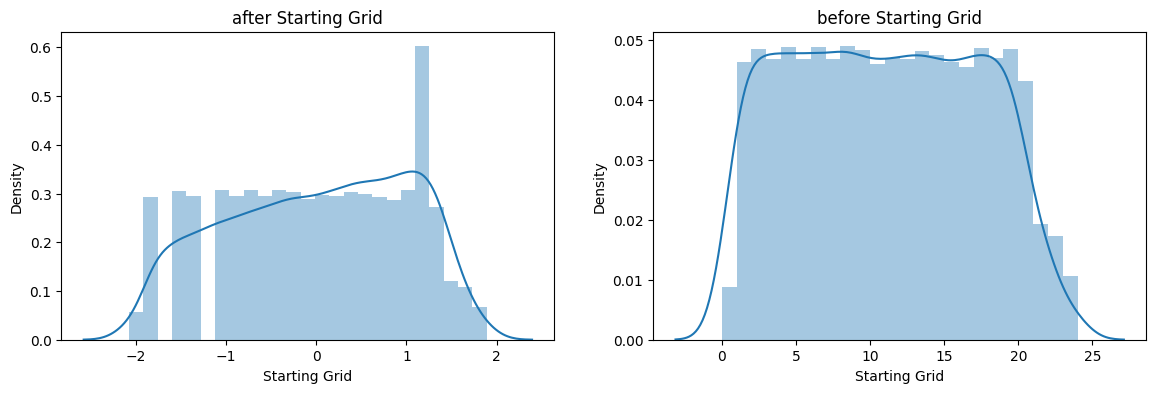

<ipython-input-16-67f12b52b6e6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trans[col])
<ipython-input-16-67f12b52b6e6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


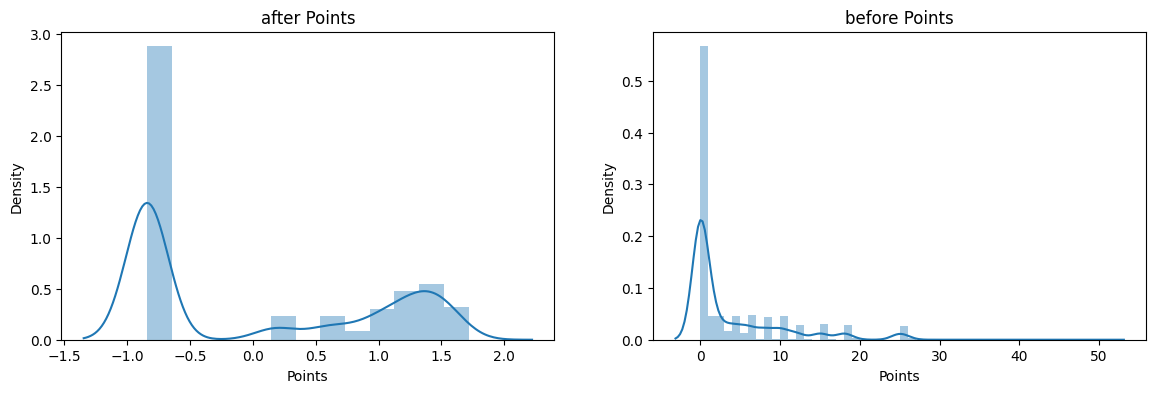

<ipython-input-16-67f12b52b6e6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_trans[col])
<ipython-input-16-67f12b52b6e6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


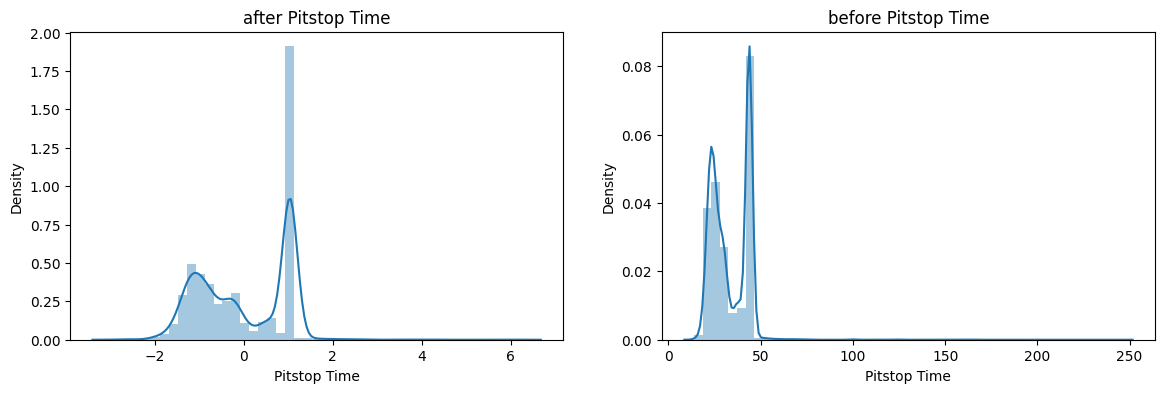

In [16]:
for col in X_train_trans.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.distplot(X_train_trans[col])
  plt.title(f"after {col}")

  plt.subplot(122)
  sns.distplot(X_train[col])
  plt.title(f"before {col}")

  plt.show()

In [17]:
print("Starting grid mean:", df['Starting Grid'].mean())
print('Starting grid STD: ', df['Starting Grid'].std())
print("Starting grid Min:", df['Starting Grid'].min())
print("Starting grif Max ", df['Starting Grid'].max())

Starting grid mean: 10.919737831739551
Starting grid STD:  6.19405582375971
Starting grid Min: 0
Starting grif Max  24


In [18]:
mean = df['Starting Grid'].mean()
std = df['Starting Grid'].std()

In [19]:
print('Highest allowed: ', mean+ 3*std)
print('Lowest allowed: ', mean-3*std)

Highest allowed:  29.50190530301868
Lowest allowed:  -7.662429639539576


In [20]:
df[(df['Starting Grid']>29.5) | (df['Starting Grid']<-7.66)]

,Year,Track,Track_encoded,Country,Country_encoded,Position,Driver,Driver_encoded,Team,Team_encoded,Starting Grid,Points,Pitstop Time,Weather,avg_confidence_score


the fuck did the outliers go sheet,,,

for pitstop time

In [21]:
df['Pitstop Time'].skew()

np.float64(2.884118347467829)

<Axes: ylabel='Starting Grid'>

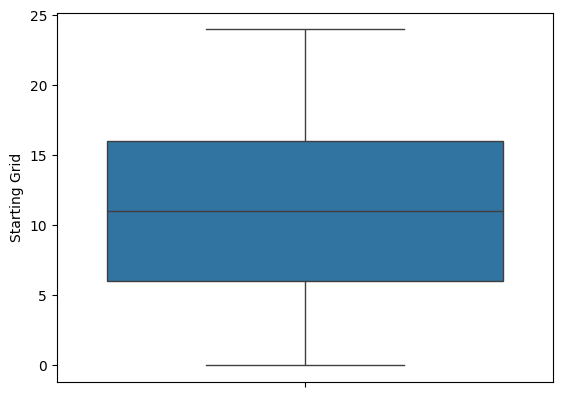

In [22]:
sns.boxplot(df['Starting Grid'])

cant believe i was trying z-score on an outlierLESS column

<Axes: ylabel='Pitstop Time'>

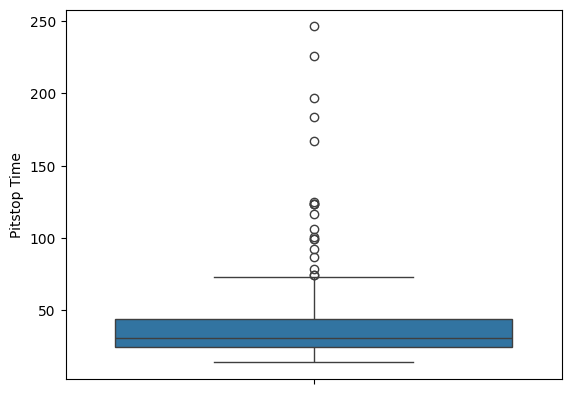

In [23]:
sns.boxplot(df['Pitstop Time'])

remember..,, those dallo dallo circles are outliersss

In [24]:
df['Pitstop Time'].describe()

,Pitstop Time
count,9307.000000
mean,33.698571
std,10.635568
min,13.895000
25%,24.256000
50%,30.926000
75%,43.771818
max,246.300000


In [25]:
percentile25 = df['Pitstop Time'].quantile(0.25)
percentile75 = df['Pitstop Time'].quantile(0.75)

In [26]:
percentile75

np.float64(43.77181752)

In [27]:
iqr = percentile75 - percentile25

In [28]:
iqr

np.float64(19.51581752)

In [29]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [30]:
lower_limit

np.float64(-5.017726279999998)

finding rows that are outliers

In [31]:
df[df['Pitstop Time']>upper_limit].shape


(19, 15)

In [32]:
df[df['Pitstop Time']<lower_limit]

,Year,Track,Track_encoded,Country,Country_encoded,Position,Driver,Driver_encoded,Team,Team_encoded,Starting Grid,Points,Pitstop Time,Weather,avg_confidence_score


## this is trimming

In [33]:
new_df = df[df['Pitstop Time']<upper_limit]

In [34]:
new_df.shape

(9288, 15)

<ipython-input-35-a01930648e3d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pitstop Time'])
<ipython-input-35-a01930648e3d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Pitstop Time'])


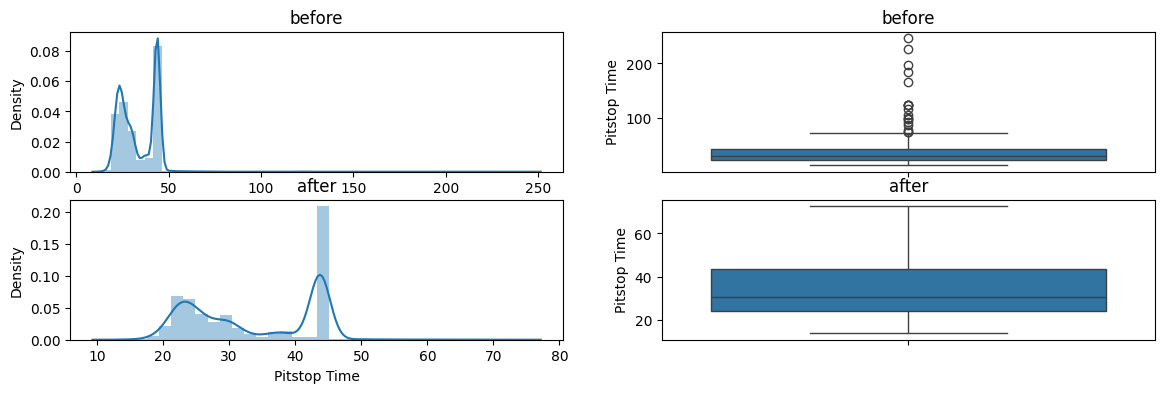

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(2,2,1)
sns.distplot(df['Pitstop Time'])
plt.title('before')

plt.subplot(2,2,2)
sns.boxplot(df['Pitstop Time'])
plt.title('before')

plt.subplot(2,2,3)
sns.distplot(new_df['Pitstop Time'])
plt.title('after')

plt.subplot(2,2,4)
sns.boxplot(new_df['Pitstop Time'])
plt.title('after')

plt.show()

## this is capping

np.where(condition, if yes the,, if no)

In [46]:
def outlier_removal(df, col):
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)

  iqr = percentile75 - percentile25

  upper_limit = percentile75 + 1.5*iqr
  lower_limit = percentile25 - 1.5*iqr

  df[col] = np.where(
      df[col]>upper_limit,
      upper_limit,
      df[col]
  )
  return df

In [45]:
new_df_cap = df.copy()

new_df_cap['Pitstop Time'] = np.where(
    new_df_cap['Pitstop Time']>upper_limit,
    upper_limit,
    new_df_cap['Pitstop Time']
)

In [37]:
new_df_cap.shape

(9307, 15)

In [38]:
new_df_cap


,Year,Track,Track_encoded,Country,Country_encoded,Position,Driver,Driver_encoded,Team,Team_encoded,Starting Grid,Points,Pitstop Time,Weather,avg_confidence_score
0,2001,Albert Park Grand Prix Circuit,0,Australia,0,1,Michael Schumacher,70,Ferrari,7,1,10.0,28.7170,1,0.783739
1,2001,Albert Park Grand Prix Circuit,0,Australia,0,2,David Coulthard,20,McLaren,17,6,6.0,28.5160,1,0.551130
2,2001,Albert Park Grand Prix Circuit,0,Australia,0,3,Rubens Barrichello,100,Ferrari,7,2,4.0,28.6580,1,0.783739
3,2001,Albert Park Grand Prix Circuit,0,Australia,0,4,Nick Heidfeld,77,Sauber,22,10,3.0,28.2470,1,0.255000
4,2001,Albert Park Grand Prix Circuit,0,Australia,0,5,Heinz-Harald Frentzen,37,Jordan,12,4,2.0,28.1420,1,0.174400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,2023,Yas Marina Circuit,37,UAE,26,16,Logan Sargeant,60,Williams,29,20,0.0,42.3810,0,0.320217
9303,2023,Yas Marina Circuit,37,UAE,26,17,Guanyu Zhou,35,Sauber,22,19,0.0,37.8030,0,0.255000
9304,2023,Yas Marina Circuit,37,UAE,26,18,Carlos Sainz,12,Ferrari,7,16,0.0,40.0685,0,0.783739
9305,2023,Yas Marina Circuit,37,UAE,26,19,Valtteri Bottas,114,Sauber,22,18,0.0,37.8030,0,0.255000


In [39]:
df['avg_confidence_score'].skew()

np.float64(0.35594641364098056)

<Axes: ylabel='avg_confidence_score'>

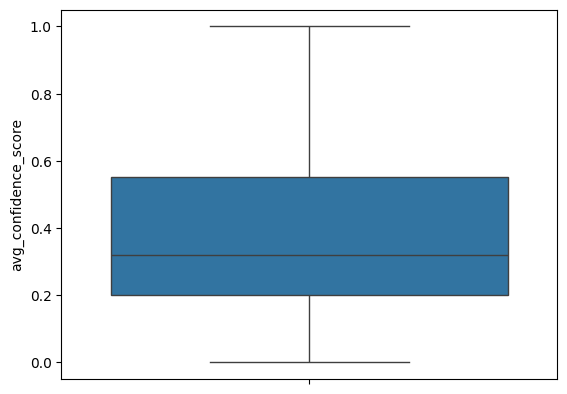

In [40]:
sns.boxplot(df['avg_confidence_score'])

In [43]:
df['Points'].skew()

np.float64(1.9362859766766596)

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Points'])
plt.title('points')
plt.subplot(122)
stats.probplot(df['Points'], dist=normal, plot=plt)
plt.title('points')

In [ ]:
percentile25_points = new_df_cap['Points'].quantile(0.25)
percentile75_points = new_df_cap['Points'].quantile(0.75)

In [ ]:
iqr = percentile75_points - percentile25_points

In [ ]:
upper_limit =

## scaling


In [41]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scala = StandardScaler()


numeric_columns_df = [new_df_cap['Country_encoded'], new_df_cap['Track_encoded'], new_df_cap['Starting Grid'], new_df_cap['Points'], new_df_cap['Pitstop Time'], new_df_cap['avg_confidence_score']]